## SIR model in Julia using DifferentialEquations

*Author*: Simon Frost @sdwfrost
*Editor*: Chris Rackauckas @ChrisRackauckas

*Date*: 2018-07-12

### Using the Macro DSL

In [1]:
using DifferentialEquations

In [2]:
sir_ode = @ode_def SIRModel begin
    dS = -β*S*I
    dI = β*S*I-γ*I
    dR = γ*I
    end β γ

┌ Warning: Symbolic calculations could not initiate. Likely there's a function which is not differentiable by SymEngine.
└ @ ParameterizedFunctions /home/simon/.julia/packages/ParameterizedFunctions/ozDxQ/src/ode_def_opts.jl:244


(::SIRModel{getfield(Main, Symbol("##3#4")),Nothing,Nothing,Nothing,Nothing,Nothing,Any,Any}) (generic function with 2 methods)

In [3]:
parms = [0.1,0.05]
init = [0.99,0.01,0.0]
tspan = (0.0,200.0)

(0.0, 200.0)

In [4]:
sir_prob = ODEProblem(sir_ode,init,tspan,parms)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 200.0)
u0: [0.99, 0.01, 0.0]

In [5]:
sir_sol = solve(sir_prob,saveat = 0.1);

### Visualisation

In [6]:
using Plots

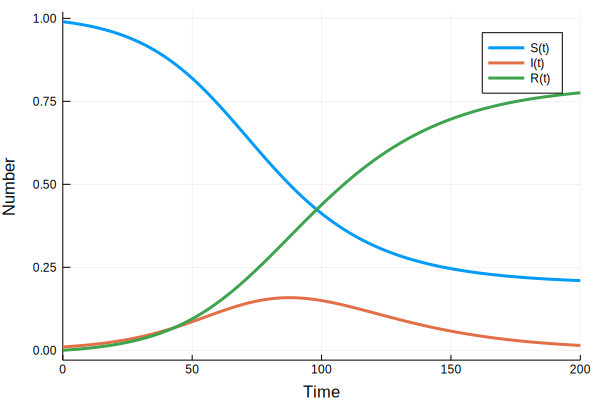

In [7]:
plot(sir_sol,xlabel="Time",ylabel="Number")

### Using the Function Interface

In [8]:
function sir_ode2(du,u,p,t)
    S,I,R = u
    b,g = p
    du[1] = -b*S*I
    du[2] = b*S*I-g*I
    du[3] = g*I
end
parms = [0.1,0.05]
init = [0.99,0.01,0.0]
tspan = (0.0,200.0)
sir_prob2 = ODEProblem(sir_ode2,init,tspan,parms)
sir_sol = solve(sir_prob2,saveat = 0.1)

retcode: Success
Interpolation: 1st order linear
t: 2001-element Array{Float64,1}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮  
 198.9
 199.0
 199.1
 199.2
 199.3
 199.4
 199.5
 199.6
 199.7
 199.8
 199.9
 200.0
u: 2001-element Array{Array{Float64,1},1}:
 [0.99, 0.01, 0.0]                 
 [0.989901, 0.0100491, 5.01227e-5] 
 [0.989801, 0.0100985, 0.000100492]
 [0.989701, 0.010148, 0.000151108] 
 [0.9896, 0.0101979, 0.000201972]  
 [0.989499, 0.0102479, 0.000253087]
 [0.989397, 0.0102982, 0.000304452]
 [0.989295, 0.0103487, 0.000356069]
 [0.989193, 0.0103995, 0.000407939]
 [0.989089, 0.0104504, 0.000460064]
 [0.988986, 0.0105017, 0.000512444]
 [0.988882, 0.0105531, 0.000565081]
 [0.988777, 0.0106049, 0.000617976]
 ⋮                                 
 [0.21018, 0.0149422, 0.774878]    
 [0.210148, 0.014899, 0.774953]    
 [0.210117, 0.0148558, 0.775027]   
 [0.210086, 0.0148128, 0.775101]   
 [0.210055, 0.01477, 0.775175]     
 [0.2100